In [2]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PRE-PROCESAMIENTO

In [3]:
# Cargar el Dataframe
df_user_reviews = pd.read_csv("C:/Users/Usuario/Desktop/Varios yo/SoyHenry/P1/Henry_PI1_Steam/data/user_reviews_2.csv")
df_user_reviews

,user_id,posted,item_id,recommend,polarity,sentiment
0,76561197970982479,2011.0,1250.0,True,0.174444,2
1,76561197970982479,2011.0,22200.0,True,0.337500,2
2,76561197970982479,2011.0,43110.0,True,0.050000,2
3,js41637,2014.0,251610.0,True,0.114583,2
4,js41637,2013.0,227300.0,True,-0.036111,0
...,...,...,...,...,...,...
59328,76561198312638244,NaN,70.0,True,0.233333,2
59329,76561198312638244,NaN,362890.0,True,0.142500,2
59330,LydiaMorley,NaN,273110.0,True,0.087500,2
59331,LydiaMorley,NaN,730.0,True,1.000000,2


In [4]:
print(df_user_reviews.isna().sum())

user_id          0
posted       10147
item_id         28
recommend       28
polarity         0
sentiment        0
dtype: int64


In [5]:
# Revisar los nulos de recommend
recommend = df_user_reviews[(df_user_reviews["recommend"] != True) & (df_user_reviews["recommend"] != False)]
recommend

,user_id,posted,item_id,recommend,polarity,sentiment
137,gdxsd,NaN,NaN,NaN,0.0,1
177,76561198094224872,NaN,NaN,NaN,0.0,1
2559,76561198021575394,NaN,NaN,NaN,0.0,1
10080,cmuir37,NaN,NaN,NaN,0.0,1
13767,Jaysteeny,NaN,NaN,NaN,0.0,1
15493,ML8989,NaN,NaN,NaN,0.0,1
19184,76561198079215291,NaN,NaN,NaN,0.0,1
20223,76561198079342142,NaN,NaN,NaN,0.0,1
25056,76561198061996985,NaN,NaN,NaN,0.0,1
26257,76561198108286351,NaN,NaN,NaN,0.0,1


Como todos los nulos de recommend tienen sentimiento neutral, los voy a rellenar con "True"

In [6]:
# Completar los valores faltantes de la columna genre con la columna tag
df_user_reviews["recommend"].fillna(True, inplace=True)

In [7]:
print(df_user_reviews.isna().sum())

user_id          0
posted       10147
item_id         28
recommend        0
polarity         0
sentiment        0
dtype: int64


In [8]:
# Eliminar la columna de polaridad porque ya la utilicé para el sentimiento 
df_user_reviews.drop("polarity", axis=1, inplace=True)

In [9]:
# Eliminar valores nulos de item_id porque no van a permitir hacer los merge con los demás datasets
df_user_reviews.dropna(subset= 'item_id', inplace=True)

In [10]:
# Renombrar la columna de 'item_id'
df_user_reviews = df_user_reviews.rename(columns={'item_id': 'id'})

In [11]:
# Eliminar valores duplicados si los hay
df_user_reviews.drop_duplicates(inplace=True)

In [12]:
df_user_reviews

,user_id,posted,id,recommend,sentiment
0,76561197970982479,2011.0,1250.0,True,2
1,76561197970982479,2011.0,22200.0,True,2
2,76561197970982479,2011.0,43110.0,True,2
3,js41637,2014.0,251610.0,True,2
4,js41637,2013.0,227300.0,True,0
...,...,...,...,...,...
59328,76561198312638244,NaN,70.0,True,2
59329,76561198312638244,NaN,362890.0,True,2
59330,LydiaMorley,NaN,273110.0,True,2
59331,LydiaMorley,NaN,730.0,True,2


In [13]:
print(df_user_reviews.isna().sum())

user_id         0
posted       9933
id              0
recommend       0
sentiment       0
dtype: int64


In [14]:
# Convertir la columna 'posted' a tipo numérico
df_user_reviews['posted'].value_counts()

posted
2014.0    21834
2015.0    18154
2013.0     6713
2012.0     1201
2011.0      530
2010.0       66
Name: count, dtype: int64

Por el momento no voy a eliminar los nulos de la fecha de posteo porque pierdo 9933 registros. Eventualmente pueden ser eliminados con una línea de código en la etapa de ML.

In [15]:
# Completar los valores faltantes de la fecha de posteo
df_user_reviews["posted"].fillna("sin fecha", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_220\1913866256.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'sin fecha' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_user_reviews["posted"].fillna("sin fecha", inplace=True)


In [16]:
print(df_user_reviews.isna().sum())

user_id      0
posted       0
id           0
recommend    0
sentiment    0
dtype: int64


### EDA POSTED

In [17]:
# Conteo de valores
df_user_reviews['posted'].value_counts()

posted
2014.0       21834
2015.0       18154
sin fecha     9933
2013.0        6713
2012.0        1201
2011.0         530
2010.0          66
Name: count, dtype: int64

In [18]:
df_user_reviews['posted'].describe()

count     58431.0
unique        7.0
top        2014.0
freq      21834.0
Name: posted, dtype: float64

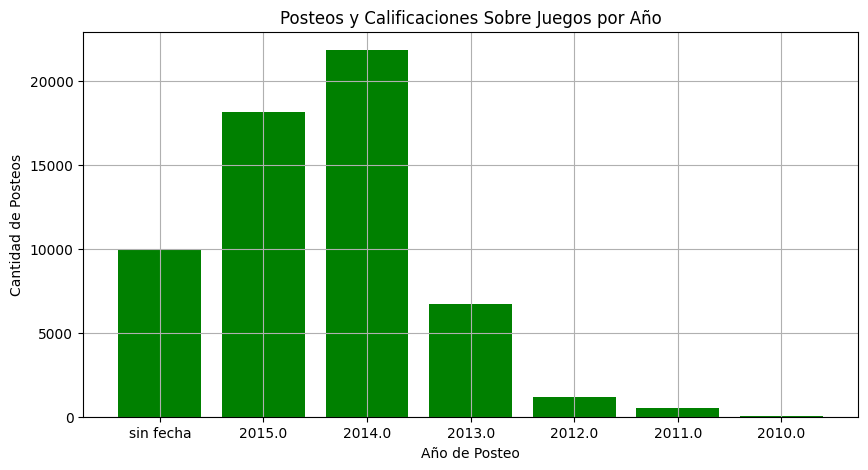

In [19]:
# Agrupar los datos por año y contar la cantidad de posteos en cada año
recuento = df_user_reviews['posted'].astype(str).value_counts().sort_index(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(recuento.index, recuento.values, color='green')

# Configurar etiquetas y título
plt.xlabel('Año de Posteo')
plt.ylabel('Cantidad de Posteos')
plt.title('Posteos y Calificaciones Sobre Juegos por Año')

# Mostrar el gráfico
plt.grid()
plt.show()

### EDA SENTIMENT

In [20]:
df_user_reviews['sentiment'].info()

<class 'pandas.core.series.Series'>
Index: 58431 entries, 0 to 59332
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
58431 non-null  int64
dtypes: int64(1)
memory usage: 913.0 KB


In [21]:
df_user_reviews['sentiment'].value_counts()

sentiment
2    33053
1    12932
0    12446
Name: count, dtype: int64

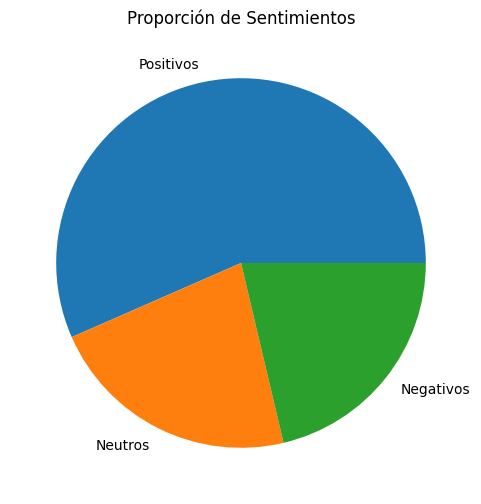

In [29]:
# Crear un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(x=df_user_reviews['sentiment'].value_counts(), labels=["Positivos", "Neutros", "Negativos"])

# Configurar título
plt.title('Proporción de Sentimientos')

# Mostrar el gráfico
plt.show()

### EDA RECOMMEND

In [32]:
df_user_reviews['recommend'].info()

<class 'pandas.core.series.Series'>
Index: 58431 entries, 0 to 59332
Series name: recommend
Non-Null Count  Dtype
--------------  -----
58431 non-null  bool 
dtypes: bool(1)
memory usage: 513.6 KB


In [33]:
df_user_reviews['recommend'].describe()

count     58431
unique        2
top        True
freq      51692
Name: recommend, dtype: object

In [30]:
df_user_reviews['recommend'].value_counts()

recommend
True     51692
False     6739
Name: count, dtype: int64

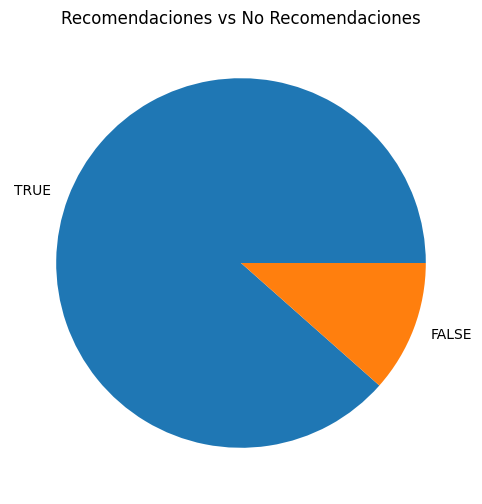

In [38]:
# Crear un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(x=df_user_reviews['recommend'].value_counts(), labels=["TRUE", "FALSE"])

# Configurar título
plt.title('Recomendaciones vs No Recomendaciones')

# Mostrar el gráfico
plt.show()

In [35]:
# Asignar el valor 1 a True y el valor 0 a False para que sea interpretado por los modelos de ML
df_user_reviews['recommend'] = df_user_reviews['recommend'].replace({True: 1, False: 0})

In [36]:
df_user_reviews

,user_id,posted,id,recommend,sentiment
0,76561197970982479,2011.0,1250.0,1,2
1,76561197970982479,2011.0,22200.0,1,2
2,76561197970982479,2011.0,43110.0,1,2
3,js41637,2014.0,251610.0,1,2
4,js41637,2013.0,227300.0,1,0
...,...,...,...,...,...
59328,76561198312638244,sin fecha,70.0,1,2
59329,76561198312638244,sin fecha,362890.0,1,2
59330,LydiaMorley,sin fecha,273110.0,1,2
59331,LydiaMorley,sin fecha,730.0,1,2


### Por último quiero ver si hay coherencia entre la columna de recomendaciones y la columna de sentimiento:

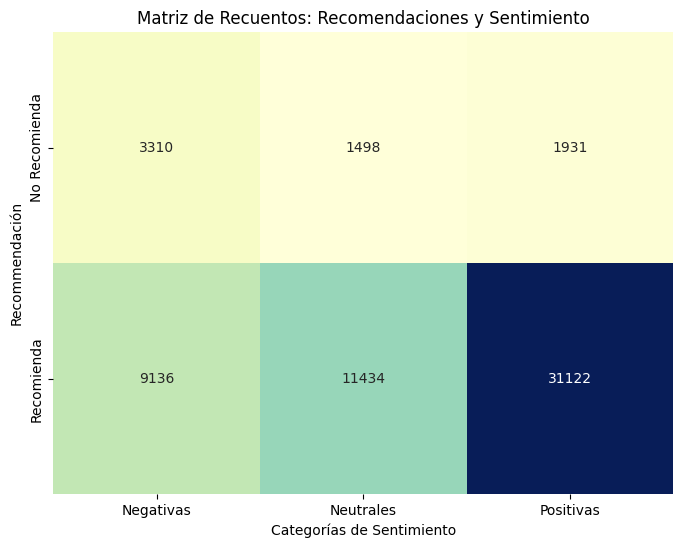

In [46]:
# Crear una tabla de contingencia (matriz de conteo)
tabla_contingencia = pd.crosstab(df_user_reviews["recommend"], df_user_reviews["sentiment"])

# Crear un heatmap para visualizar la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Categorías de Sentimiento")
plt.ylabel("Recommendación")
plt.title("Matriz de Recuentos: Recomendaciones y Sentimiento")

# Personalizar las etiquetas de los ejes
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Negativas", "Neutrales", "Positivas"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Recomienda", "Recomienda"])

# Mostrar la matriz
plt.show()

### Se observa una buena correspondencia entre los positivos de recomendación y sentimeinto, pero una mala correspondencia entre los negativos, es decir que cuando realicé el análisis de sentimiento, el modelo (la librería), calificó como reseñas negativas un montón de posteos en lo que se recomendó el juego. Esto es lo que se podría llamar "Falsos Negativos", ya que la Recomendación es un valor exacto y el Sentimiento es una valoración de un modelo.

In [47]:
df_user_reviews

,user_id,posted,id,recommend,sentiment
0,76561197970982479,2011.0,1250.0,1,2
1,76561197970982479,2011.0,22200.0,1,2
2,76561197970982479,2011.0,43110.0,1,2
3,js41637,2014.0,251610.0,1,2
4,js41637,2013.0,227300.0,1,0
...,...,...,...,...,...
59328,76561198312638244,sin fecha,70.0,1,2
59329,76561198312638244,sin fecha,362890.0,1,2
59330,LydiaMorley,sin fecha,273110.0,1,2
59331,LydiaMorley,sin fecha,730.0,1,2


In [48]:
# Exportar el Dataframe a .csv eliminando el índice
df_user_reviews.to_csv("data/user_reviews_3.csv", index=False)

In [49]:
# Verificar el .csv
df = pd.read_csv("data/user_reviews_3.csv")
df

,user_id,posted,id,recommend,sentiment
0,76561197970982479,2011.0,1250.0,1,2
1,76561197970982479,2011.0,22200.0,1,2
2,76561197970982479,2011.0,43110.0,1,2
3,js41637,2014.0,251610.0,1,2
4,js41637,2013.0,227300.0,1,0
...,...,...,...,...,...
58426,76561198312638244,sin fecha,70.0,1,2
58427,76561198312638244,sin fecha,362890.0,1,2
58428,LydiaMorley,sin fecha,273110.0,1,2
58429,LydiaMorley,sin fecha,730.0,1,2
